# A simple exoplanet system

In [2]:
import numpy as np
import starry

In [3]:
starry.config.lazy = False

## 1. Creating a star

In [4]:
star = starry.Primary(starry.Map(deg=0, udeg=2, amp=1.0), m=1.0, r=1.0, prot=1.0)

In [5]:
star.map[1] = 0.40
star.map[2] = 0.26

Compiling `set_vector`...

sleep:  set_vector


 Done.


sleep:  set_vector


In [6]:
type(star.map)

starry.maps.Map.<locals>.Map

Compiling `render_ld`...WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


sleep:  render_ld


 Done.


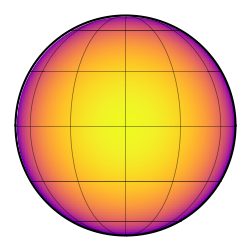

In [7]:
star.map.show()

## 2. Creating a planet

In [8]:
planet = starry.Secondary(starry.Map(ydeg=5, amp=5e-3), m=0, 
                                 r=0.1,
                          porb=1.0,
                          prot=1.0,
                          Omega=30,
                          ecc=0.3,
                          w=30,
                          t0=0,
                         )

Pre-computing some matrices... Done.


dotr value:  <bound method PyCapsule.dotR of <starry._c_ops.Ops object at 0x7fedebf16ef0>>


In [9]:
planet.map._y

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [58]:
star.r

1.0

In [10]:
import exoplanet

In [12]:
orbit = exoplanet.orbits.KeplerianOrbit(
    period=1.0,
    t0 = 0.0,
    incl = 90, 
    ecc = 0.3,
    omega=30,
    Omega = 30, 
    m_planet = 0.0, 
    m_star = 1.0,
    r_star = 1.0)
    

In [25]:
x,y,z = orbit.get_relative_position(time)

In [26]:
x0 = x.eval()
y0 = y.eval()
z0 = z.eval()

In [27]:
z0.shape

(10000,)

In [28]:
x00 = x0.reshape((-1,1))
y00 = y0.reshape((-1,1))
z00 = z0.reshape((-1,1))

In [39]:
x00.shape

(10000, 1)

In [30]:
x00[:,0].shape

(10000,)

In [34]:
xo = x00[:,0]/1.0
yo = y00[:,0]/1.0
z0 = z00[:,0]/1.0

In [35]:
ro = 0.1/1

In [36]:
b = np.sqrt(xo**2 +yo**2)

In [38]:
b.shape

(10000,)

In [15]:
np.random.seed(123)
planet.map[1:,:] = 0.01*np.random.randn(planet.map.Ny - 1)

Compiling `set_vector`... Done.


sleep:  set_vector


Compiling `render`...

sleep:  render
is tensor:  compute_rect_grid <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  RAxisAngle <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  compute_moll_grid <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  RAxisAngle <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  compute_ortho_grid <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  pT <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  left_project <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  dotR <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
dotROp: make node
is tensor:  tensordotRz <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
is tensor:  dotR <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
dotROp: make node
is tensor:  dotR <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
dotROp: make node
is tensor:  dotR <starry._core.core.OpsYlm object at 0x7f07f0e9ef20>
dotROp: make node
dotROp: infer_shape


 Done.


dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform


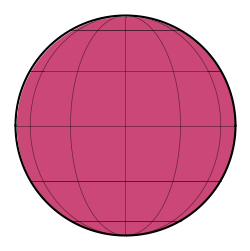

In [31]:
planet.map.show()

In [16]:
planet.theta0 = 180

In [17]:
planet.map.minimize()

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Compiling `get_minimum`... Done.


sleep:  get_minimum


(63.14152819709035, -16.776160764628425, 0.0013165107708421693)

## 3. Creating a system

In [18]:
system = starry.System(star, planet)

In [43]:
dir(system)

['_C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bodies',
 '_flux',
 '_get_periods',
 '_inds',
 '_lazy',
 '_light_delay',
 '_linalg',
 '_math',
 '_no_spectral',
 '_oblate',
 '_order',
 '_oversample',
 '_primary',
 '_reflected',
 '_rv',
 '_secondaries',
 '_solution',
 '_solved_bodies',
 '_texp',
 '_time_factor',
 '_time_unit',
 'bodies',
 'design_matrix',
 'draw',
 'flux',
 'light_delay',
 'lnlike',
 'map_indices',
 'ops',
 'order',
 'oversample',
 'position',
 'primary',
 'rv',
 'secondaries',
 'set_data',
 'show',
 'solution',
 'solve',
 'texp',
 'time_unit']

In [83]:
inputs = "t = array([-0.25      , -0.24964996, -0.24929993, ...,  3.24929993,\n
        3.24964996,  3.25      ]), \n
          pri_r = array(1.), \n
          pri_m = array(1.), \n
          pri_prot = array(1.), \n
          pri_t0 = array(0.),  \n
          pri_theta0 = array(0.), \n
          pri_amp = array(1.), \n
          pri_inc = array(1.57079633), \n
          pri_obl = array(0.), \n
          pri_fproj = array(0.), \n
          pri_u = array([-1.  ,  0.4 ,  0.26]), \n
          pri_f = array([3.14159265]), \n
          sec_r = array([0.1]), \n
          sec_m = array([0.]), \n
          sec_prot = array([1.]), \n
          set_t0 = array([0.]), \n
          sec_theta0 = array([0.]), \n
          sec_porb = array([1.]), \n
          sec_ecc = array([0.3]), \n
          sec_w = array([0.52359878]), \n
          sec_Omega = array([0.52359878]), \n
          sec_iorb = array([1.57079633]), \n
          sec_amp = array([1.]), \n
          sec_inc = array([1.57079633]), \n
          sec_obl = array([0.]), \n
          sec_u = array([[-1.]]), \n
          sec_f = array([[3.14159265]]), \n
          sec_sigr = array([0.])"

SyntaxError: unterminated string literal (detected at line 1) (2748327997.py, line 1)

## 4. Computing light curves

### 1. computing light curve of the system

In [19]:
%%time
time = np.linspace(-0.25, 3.25, 10000)
flux_system = system.flux(time)

Compiling `X`...

sleep:  X
oblate false
es call: LD_X
reflected false
es call: LD_X


 Done.


X [array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])]
CPU times: user 624 ms, sys: 38.5 ms, total: 662 ms
Wall time: 11.2 s


In [24]:
flux_system[0]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [20]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (10000,) and (2, 10000, 1)

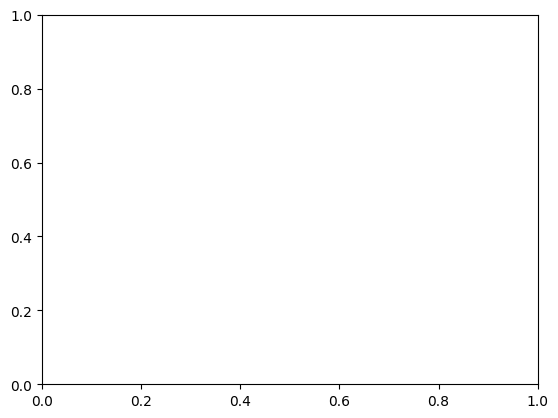

In [21]:
plt.plot(time, flux_system)
plt.xlabel("time [deys]")
plt.ylabel("system flux");

In [23]:
flux_system.shape

(10000,)

### 2. computing the light curves of the star and the planet

In [40]:
flux_star, flux_planet = system.flux(time, total=False)

sleep:  X
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform


Text(0, 0.5, 'staellar flux')

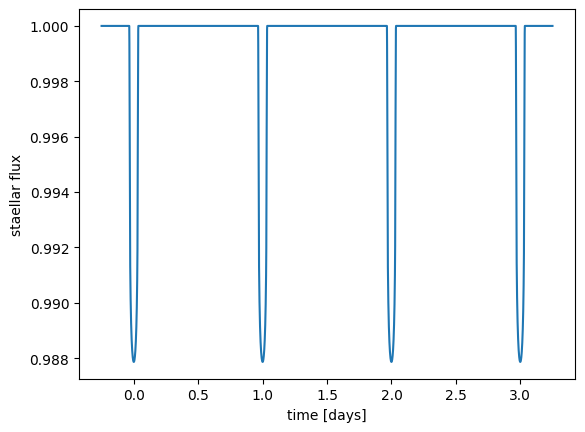

In [41]:
plt.plot(time, flux_star)
plt.xlabel("time [days]")
plt.ylabel("staellar flux")

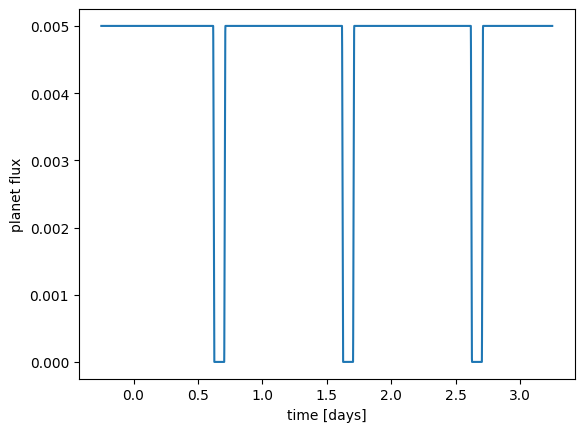

In [42]:
plt.plot(time, flux_planet)
plt.xlabel("time [days]")
plt.ylabel("planet flux");

### 3.calculating the position of planet in xyz 

In [27]:
x,y,z = system.position(time)

Compiling `position`...

sleep:  position


 Done.


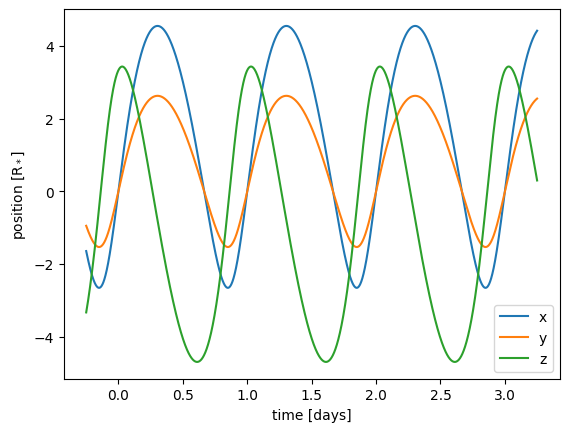

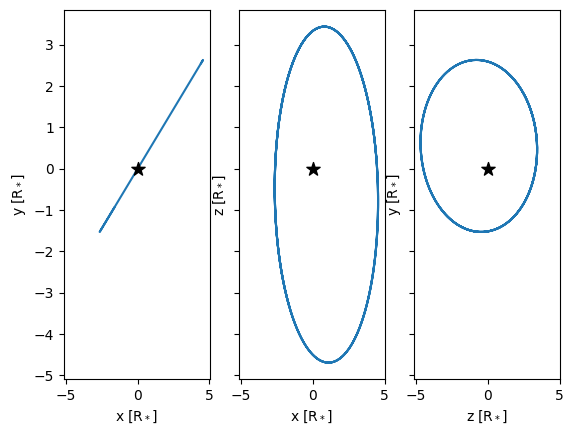

In [28]:
plt.plot(time, x[1], label="x")
plt.plot(time, y[1], label="y")
plt.plot(time, z[1], label="z")
plt.ylabel("position [R$_*$]")
plt.xlabel("time [days]")
plt.legend()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
ax[0].plot(x[1], y[1])
ax[1].plot(x[1], z[1])
ax[2].plot(z[1], y[1])
for n in [0, 1, 2]:
    ax[n].scatter(0, 0, marker="*", color="k", s=100, zorder=10)
ax[0].set_xlabel(r"x [R$_*$]")
ax[0].set_ylabel(r"y [R$_*$]")
ax[1].set_xlabel(r"x [R$_*$]")
ax[1].set_ylabel(r"z [R$_*$]")
ax[2].set_xlabel(r"z [R$_*$]")
ax[2].set_ylabel(r"y [R$_*$]");



### 4. animating the orbit

In [29]:
planet.r = 0.33
system.show(t=np.linspace(0, 1, 50), window_pad=4, figsize=(8, 8))

Compiling `render`...

sleep:  render
is tensor:  render <starry._core.core.OpsLD object at 0x7f08613d3be0>
is tensor:  render_ld <starry._core.core.OpsLD object at 0x7f08613d3be0>
is tensor:  intensity <starry._core.core.OpsLD object at 0x7f08613d3be0>
is tensor:  render <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  compute_rect_grid <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  RAxisAngle <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  compute_moll_grid <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  RAxisAngle <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  compute_ortho_grid <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  pT <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  left_project <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
is tensor:  dotR <starry._core.core.OpsYlm object at 0x7f07f5b507f0>
dotROp: make node
is tensor:  tensordotRz <starry._core.core.OpsYlm object at 0x7f07f5b5

 Done.


dotROp: perform
dotROp: perform
dotROp: perform
dotROp: perform
